In [972]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy.io import loadmat
import pdb

In [973]:
def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    imgs = data['data_patterns']
    labels = data['data_labels']
    return imgs, labels

In [974]:
def perceptron_train(X,Y,Xtest,Ytest,iterations=100,eta=.1):
    # initialize accuracy vector
    acc = np.zeros(iterations) #we will capture acc each iteration
    # initialize weight vector
    weights = np.random.randn(X.shape[0]) * 0.01 #assign random weights
    # loop over iterations
    for it in np.arange(iterations):
        # indices of misclassified data
        wrong = [i for i,(pred,true) in enumerate(zip(np.sign(np.dot(weights, X)),Y)) if pred !=true]
        wrong = np.array(wrong) #calculating location of datapoint regarding desicion boundry created by weights and is it its true label (misclassified)
        # check if there is misclassified data
        if wrong.shape[0] > 0:
            # pick a random misclassified data point
            rit=np.random.choice(wrong)
            # update weight vector
            weights +=(eta /(it+1)) * Y[rit] * X[:, rit]
            #if it % 10 == 0 and it > 0:
            #   eta = eta / 2
            #eta = eta *np.exp(-0.05 * it)
            # compute error
            acc[it]= np.mean(np.sign(np.dot(weights, Xtest))==Ytest)


    # return weight vector and error
    return weights,acc

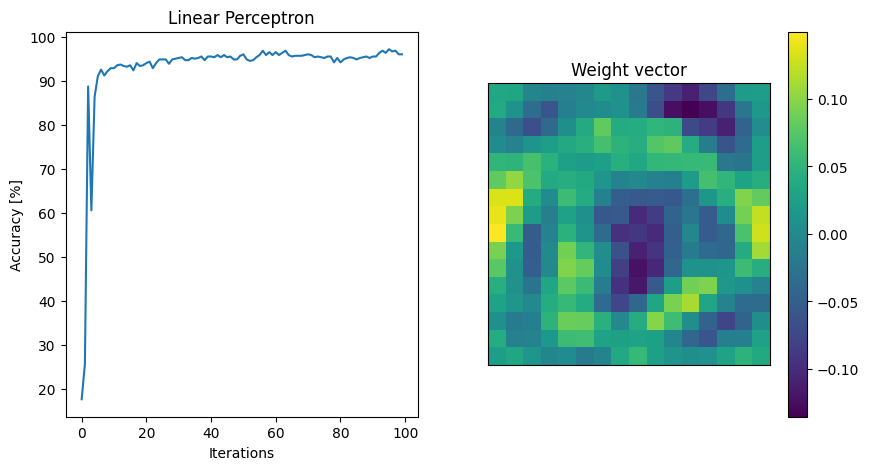

In [975]:
digit = 0
fname = "usps.mat"

imgs,labels = load_data(fname)
# we only want to classify one digit 
labels = np.sign((labels[digit,:]>0)-.5)

# please think about what the next lines do
permidx = np.random.permutation(np.arange(imgs.shape[-1]))
trainpercent = 70.
stopat = np.floor(labels.shape[-1]*trainpercent/100.)
stopat= int(stopat)

# cut segment data into train and test set into two non-overlapping sets:
X = imgs[:, permidx[:stopat]]
Y = labels[permidx[:stopat]]
Xtest = imgs[:, permidx[stopat:]]
Ytest = labels[permidx[stopat:]]

#check that shapes of X and Y make sense..
# it might makes sense to print them

w,acc_perceptron = perceptron_train(X,Y,Xtest,Ytest)

fig = pl.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(acc_perceptron*100.)
pl.xlabel('Iterations')
pl.title('Linear Perceptron')
pl.ylabel('Accuracy [%]')

# and imshow the weight vector
ax2 = fig.add_subplot(1,2,2)
# reshape weight vector
weights = np.reshape(w,(int(np.sqrt(imgs.shape[0])),int(np.sqrt(imgs.shape[0]))))
# plot the weight image
imgh = ax2.imshow(weights)
# with colorbar
pl.colorbar(imgh)
ax2.set_title('Weight vector')
# remove axis ticks
pl.xticks(())
pl.yticks(())
# remove axis ticks
pl.xticks(())
pl.yticks(())

# write the picture to pdf
fname = 'Perceptron_digits-%d.pdf'%digit
pl.savefig(fname)

